<font size="6"> Table of Contents</font>
<a id='destination_cell_10'></a> <br>
[Section 1](#destination_cell_1) <br><blockquote>
        1) Imports<br>
        2) Snakecase and lowercase column names<br>
        3) Null counts<br>
        4) Summary Statistics<br>
        5) Overview of the data<br> </blockquote>
[Section 2](#destination_cell_2)<br><blockquote>
        1) Pairplots<br>
        2) Identify erroneous values vs outlier values<br>
        3) Drop all observations that are not zoned as medium or low density residential housing (out of scope observations)<br>
        4) Drop "pid" and "id" columns as they cannot be features of the target variable<br>
        5) Drop observations for columns that have less than 3 null values<br>
        6) Drop Columns with more than 105 nulls<br> </blockquote>
[Section 3](#destination_cell_3)<br><blockquote>
        1) Evaluate distributions for features we will impute values for<br>
        2) Heatmap<br></blockquote>
[Section 4](#destination_cell_4)<br><blockquote>
        1) Set x and y<br>
        2) split data into train and validation sets<br>
        3) Impute values for trainning set<br>
        4) Impute values for validation set<br></blockquote>
[Section 5](#destination_cell_5)<br><blockquote>
        1) Columntransformer<br>
        2) One Hot Encode<br>
        3) Standard Scalar<br></blockquote>
[Section 6](#destination_cell_6)<br><blockquote>
        1) Linear Regression<br>
        2) Coefficient Equation<br>
        3) Comfrot over Assumptions<br>
        4) Evaluate Results<br></blockquote>
[Section 7](#destination_cell_7)<br><blockquote>
        1) Ridge Regression<br>
        2) Comfrot over Assumptions<br>
        3) Evaluate Results<br></blockquote>
[Section 8](#destination_cell_8)<br><blockquote>
        1) LASSO Regression<br>
        2) Comfrot over Assumptions<br>
        3) Evaluate Results<br></blockquote>
[Section 9](#destination_cell_9)<br><blockquote>
        1) Elastic Regression<br>
        2) Comfrot over Assumptions<br>
        3) Evaluation Results<br></blockquote>

        





<font size="8">Section 1</font>
<a id='destination_cell_1'></a>

[Return to Table of Contents](#destination_cell_10)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats 
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.linear_model import ElasticNet

In [2]:
%cd /Users/nicholassanso/Desktop/GA/projects/project-2

/Users/nicholassanso/Desktop/GA/projects/project-2


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
df= pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [5]:
new_columns = [column.replace(' ', '_').replace('/', '_').lower() for column in df.columns]

df.columns = new_columns
print(new_columns)

['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'overall_qual', 'overall_cond', 'year_built', 'year_remod_add', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive', 'wood_deck_sf'

**Exclude ms_zoning variables from all the dataframes because it is a completely different regression variable <br>
Exclude garage_cars because it measures in a metric, "length of car" which is a nonstandardized and meaningless metric (we also already have garage_area which measures a something very similar)**

In [6]:
df_size = df[['id', 'pid', 'saleprice', 'misc_val', 'lot_frontage', 'lot_area', 'bsmtfin_sf_2', 'bsmt_unf_sf', 
              'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'garage_area', 'wood_deck_sf',
              'open_porch_sf', 'enclosed_porch', 'pool_area', 'screen_porch', '3ssn_porch']].copy()

df_quality_of_house_vars = df[['id', 'pid', 'saleprice', 'misc_val', 'overall_qual', 'overall_cond', 'exter_qual',
                               'exter_cond','bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 
                               'kitchen_qual', 'functional', 'fireplace_qu','garage_qual', 'garage_finish', 
                               'garage_cond', 'fence', 'pool_qc']].copy()

df_age_vars = df[['id', 'pid', 'saleprice', 'misc_val', 'year_built', 'year_remod_add', 'garage_yr_blt', 
                  'yr_sold','mo_sold']].copy()

df_roommage_vars = df[['id','pid','saleprice','misc_val','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath',
                       'bedroom_abvgr','kitchen_abvgr', 'totrms_abvgrd','fireplaces']].copy()

df_environment_vars = df[['id','pid','saleprice','misc_val','street','alley','neighborhood']].copy()


df_categories_of_house_vars = df[['id','pid','saleprice','misc_val','roof_style','roof_matl','exterior_1st',
                                  'exterior_2nd','mas_vnr_type', 'foundation','bsmt_exposure','heating','heating_qc',
                                  'central_air','electrical','garage_type','paved_drive', 'ms_subclass',
                                  'bldg_type','lot_shape','land_contour','utilities', 'lot_config',
                                      'land_slope','condition_1','condition_2','house_style']].copy()



#df_categories_of_house_vars_MIN_MAX_ORDINALencode= df[[ bsmt_exposure, heating_qc

#df_categories_of_house_vars_OHE= df[[roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, 
#foundation, heating, central_air, electrical, garage_type,paved_drive, ms_subclass, bldg_type, lot_shape,
#land_contour, utilities, lot_config, land_slope, land_contour, condition_1, condition_2


In [7]:
df['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: misc_feature, dtype: int64

In [8]:
df['misc_val'].value_counts()

0        1986
400        12
500         8
600         6
450         5
2000        5
700         4
1200        2
3000        2
2500        2
4500        2
17000       1
1300        1
900         1
1500        1
800         1
6500        1
54          1
3500        1
1150        1
300         1
455         1
8300        1
460         1
12500       1
480         1
650         1
80          1
Name: misc_val, dtype: int64

Ultimately we would like to predict the sales price of a house.<br> 

Embedded in some (65) of our sales price datapoints is the value of miscellanious features. misc_features is unique in the datatset as it is the only feature of a house in which we are also given its exact monetary value (and therefore contribution to the target variable, salesprice). As a result, we can get a more acurate understanding of the relationship between our predictor variables and our target variable of saleprice if we remove the value of the miscellanious features from saleprice, as leaving its value in saleprice would only serve as a confounding variable. After removing the value of the miscellanious features from saleprice, we are no longer strictly predicting saleprice, but the portion of saleprice that is not attributable to the miscellanious features. <br>

Subtracting the value of the miscelanious features provides the additional benefit of not losing the predictive power of the the miscelanious variables in predicting salesprice and not having to incorporate a predictive variable in which the vast majority of its values are imputed. The histograms below underscroe this point and allow illustrate two conclusions: <br> 
1) The miscellanious features are mostly sheds of nominal value <br> 
2) Most of our observations don't have a miscellanious value <br> 
    2.a. If we included miscellanious feature as a our regression we would have to impute values for the nulls which comprise the vast majority of our obsevations. <br>

From these two conclusions, it is probably best to drop these two features altogether.

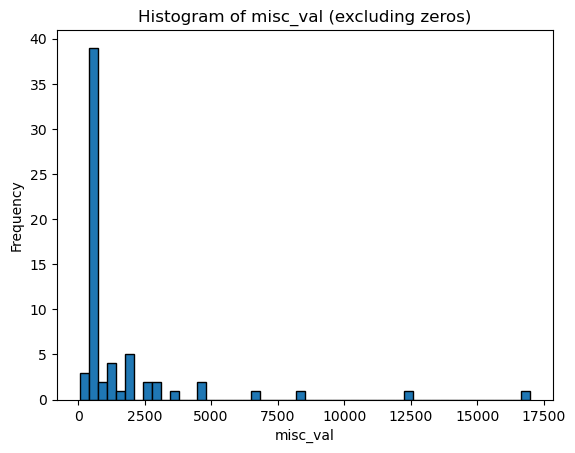

In [9]:
#Use the y-axis to gauge how few observations actually have miscellanious features and how many of the miscellanious features are of nominal value.

df_no_zeros = df[df['misc_val'] != 0]

plt.hist(df_no_zeros['misc_val'], bins=50, edgecolor='black')
plt.title('Histogram of misc_val (excluding zeros)')
plt.xlabel('misc_val')
plt.ylabel('Frequency')
plt.show()


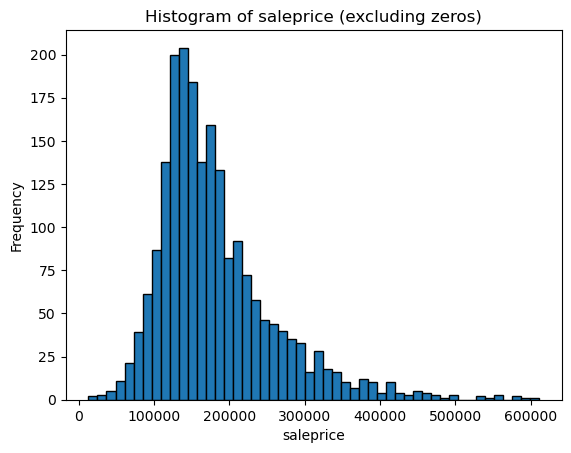

In [10]:
#Use the x-axis to gauge the distribution of saleprices for the observations
plt.hist(df['saleprice'], bins=50, edgecolor='black')
plt.title('Histogram of saleprice (excluding zeros)')
plt.xlabel('saleprice')
plt.ylabel('Frequency')
plt.show()


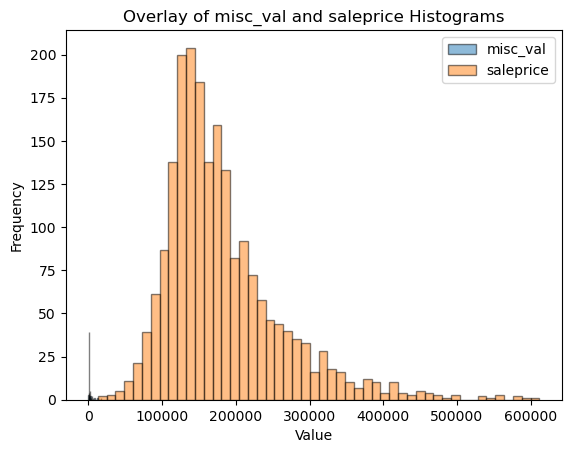

In [11]:
#plot the two histograms overlayed on one another to visually represent how immaterial misc_val is to saleprice as part of the justification for dropping the 
#feature from the regression model.

plt.hist(df_no_zeros['misc_val'], bins=50, edgecolor='black', alpha=0.5, label='misc_val')
plt.hist(df['saleprice'], bins=50, edgecolor='black', alpha=0.5, label='saleprice')

plt.title('Overlay of misc_val and saleprice Histograms')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

**Some of the houses have high value miscelanious features like elevators. However, there is another feature, misc_value which specifically denotes the dollar amount of these features" so when training our model, we don't actually want to train it to predict saleprice, we want it to train to predict saleprice-misc_val, and then if a miscellanious item exists, to add on the value of the miscelleanious item at the end.**

In [12]:
def add_new_column(df):
    df['saleprice-misc_val'] = df['saleprice'] - df['misc_val']
    return df

df_size = add_new_column(df_size)
df_quality_of_house_vars = add_new_column(df_quality_of_house_vars)
df_age_vars = add_new_column(df_age_vars)
df_roommage_vars = add_new_column(df_roommage_vars)
df_environment_vars = add_new_column(df_environment_vars)
df_categories_of_house_vars = add_new_column(df_categories_of_house_vars)

Below is the print

In [13]:
#use the null values print out to determine if any of the features have so many nulls that imputing them and 
#using 
#use a print out of the number of unqiue values to determine if the data dictionary needs to be consulted to determine if a variable is categorical.

unique_values = df_size.nunique()
print("Number of unique values:\n", unique_values)

null_values = df_size.isnull().sum()
print("\nNumber of null values:\n", null_values)

print("\nData types:\n", df_size.dtypes)


Number of unique values:
 id                    2051
pid                   2051
saleprice              828
misc_val                28
lot_frontage           118
lot_area              1476
bsmtfin_sf_2           205
bsmt_unf_sf            967
total_bsmt_sf          892
1st_flr_sf             915
2nd_flr_sf             504
low_qual_fin_sf         31
garage_area            514
wood_deck_sf           322
open_porch_sf          223
enclosed_porch         159
pool_area               10
screen_porch           100
3ssn_porch              22
saleprice-misc_val     859
dtype: int64

Number of null values:
 id                      0
pid                     0
saleprice               0
misc_val                0
lot_frontage          330
lot_area                0
bsmtfin_sf_2            1
bsmt_unf_sf             1
total_bsmt_sf           1
1st_flr_sf              0
2nd_flr_sf              0
low_qual_fin_sf         0
garage_area             1
wood_deck_sf            0
open_porch_sf           0
enclos

Some square footage variables that have high correlations and therefore violate regression's no multicollinearity requirement. In particular we see a correlation of .81 between the squre footage of the basement and the first floor. We also see a .57 correlation between lot area and lot frontage. Instead of removing one of hte highly correlated vairables, we will perform PCA on all of the square footage variables

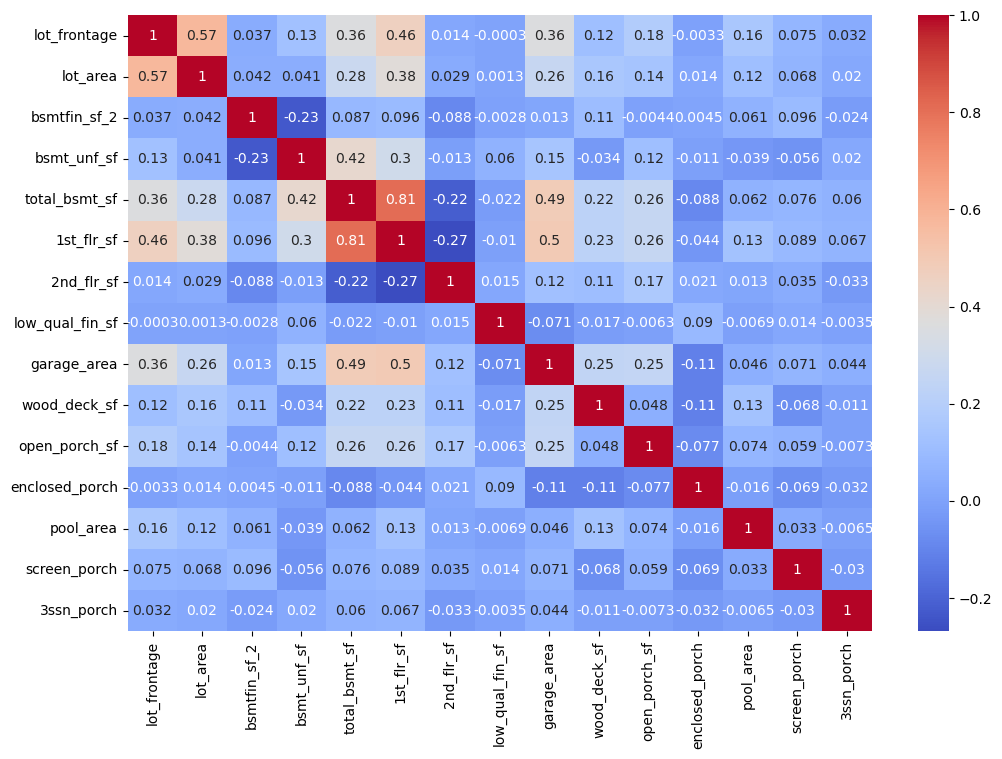

In [14]:
# List of columns to exclude
exclude_columns = ['id', 'pid', 'saleprice','misc_val','saleprice-misc_val']

# Drop the columns
df_size = df_size.drop(columns=exclude_columns)

# Create the heatmap
plt.figure(figsize=(12,8)) # Set the figure size
sns.heatmap(df_size.corr(), annot=True, cmap='coolwarm') # Create a heatmap with correlations
plt.show()


In [16]:
#use the prin
#use a print out of the number of unqiue values to determine if the data dictionary needs to be consulted to determine if a variable is categorical.

unique_values = df_categories_of_house_vars.nunique()
print("Number of unique values:\n", unique_values)

null_values = df_categories_of_house_vars.isnull().sum()
print("\nNumber of null values:\n", null_values)

print("\nData types:\n", df_categories_of_house_vars.dtypes)


Number of unique values:
 id                    2051
pid                   2051
saleprice              828
misc_val                28
roof_style               6
roof_matl                6
exterior_1st            15
exterior_2nd            15
mas_vnr_type             4
foundation               6
bsmt_exposure            4
heating                  5
heating_qc               5
central_air              2
electrical               5
garage_type              6
paved_drive              3
ms_subclass             16
bldg_type                5
lot_shape                4
land_contour             4
utilities                3
lot_config               5
land_slope               3
condition_1              9
condition_2              8
house_style              8
saleprice-misc_val     859
dtype: int64

Number of null values:
 id                      0
pid                     0
saleprice               0
misc_val                0
roof_style              0
roof_matl               0
exterior_1st            

In [17]:
df_quality_of_house_vars.dtypes

id                     int64
pid                    int64
saleprice              int64
misc_val               int64
overall_qual           int64
overall_cond           int64
exter_qual            object
exter_cond            object
bsmt_qual             object
bsmt_cond             object
bsmtfin_type_1        object
bsmtfin_type_2        object
kitchen_qual          object
functional            object
fireplace_qu          object
garage_qual           object
garage_finish         object
garage_cond           object
fence                 object
pool_qc               object
saleprice-misc_val     int64
dtype: object

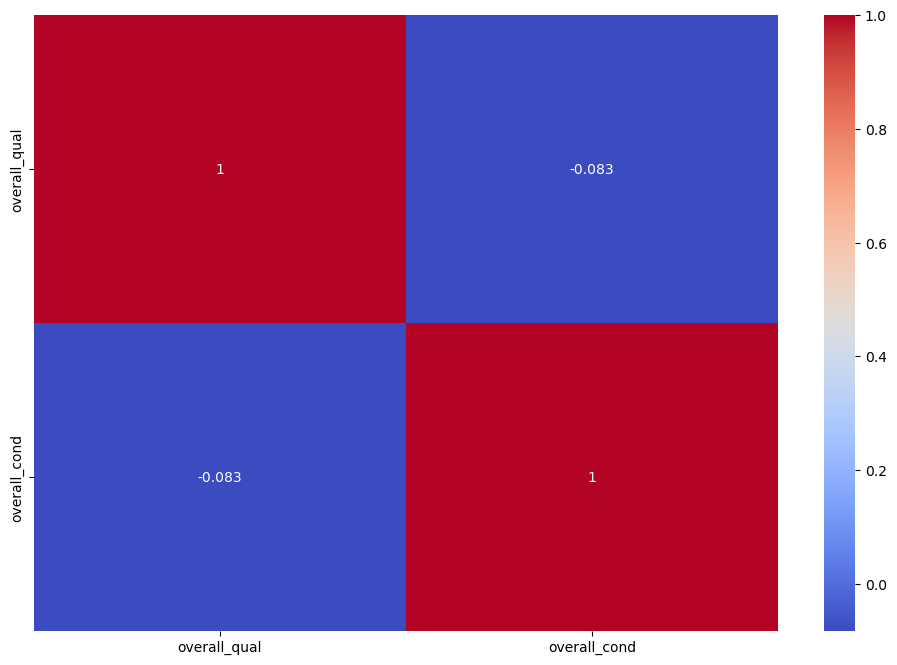

In [114]:
df_quality_of_house_vars_sns = df_quality_of_house_vars[['overall_qual','overall_cond']]

# Create the heatmap
plt.figure(figsize=(12,8)) # Set the figure size
sns.heatmap(df_quality_of_house_vars_sns.corr(), annot=True, cmap='coolwarm') # Create a heatmap with correlations
plt.show()


In [18]:
df_age_vars.dtypes

id                      int64
pid                     int64
saleprice               int64
misc_val                int64
year_built              int64
year_remod_add          int64
garage_yr_blt         float64
yr_sold                 int64
mo_sold                 int64
saleprice-misc_val      int64
dtype: object

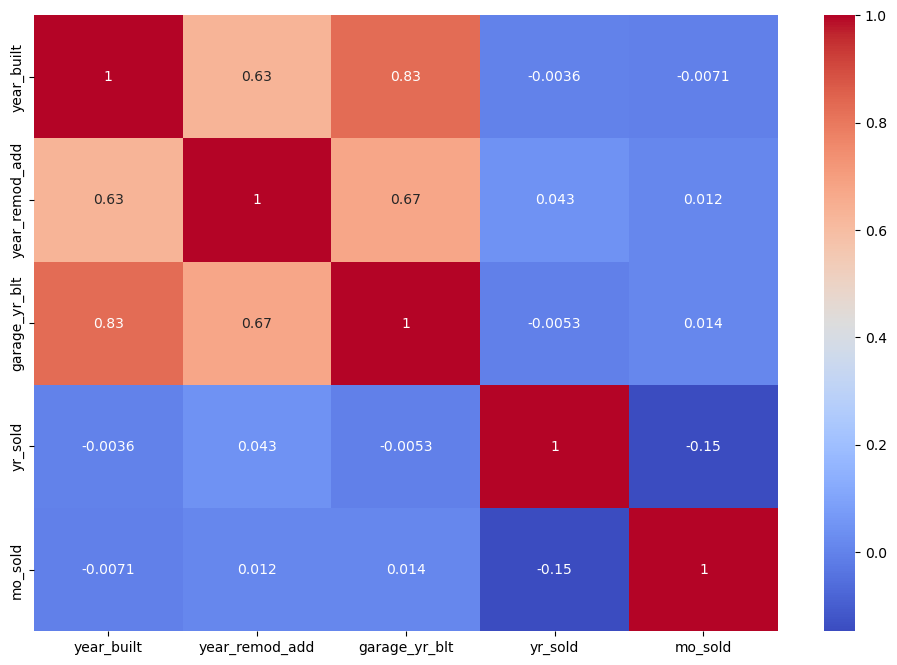

In [19]:
# List of columns to exclude
exclude_columns = ['id', 'pid', 'saleprice','misc_val','saleprice-misc_val']

# Drop the columns
df_age_vars = df_age_vars.drop(columns=exclude_columns)

# Create the heatmap
plt.figure(figsize=(12,8)) # Set the figure size
sns.heatmap(df_age_vars.corr(), annot=True, cmap='coolwarm') # Create a heatmap with correlations
plt.show()


In [20]:
df_roommage_vars.dtypes

id                      int64
pid                     int64
saleprice               int64
misc_val                int64
bsmt_full_bath        float64
bsmt_half_bath        float64
full_bath               int64
half_bath               int64
bedroom_abvgr           int64
kitchen_abvgr           int64
totrms_abvgrd           int64
fireplaces              int64
saleprice-misc_val      int64
dtype: object

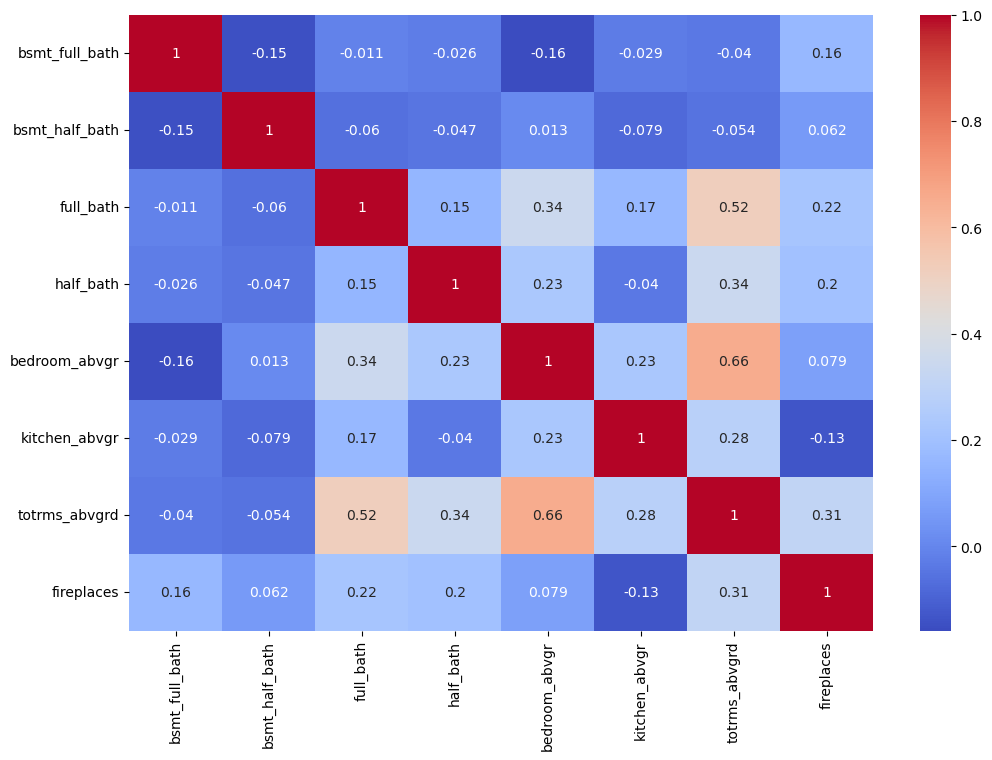

In [110]:
# List of columns to exclude
exclude_columns = ['id', 'pid', 'saleprice','misc_val','saleprice-misc_val']

# Drop the columns
df_roommage_vars = df_roommage_vars.drop(columns=exclude_columns)

# Create the heatmap
plt.figure(figsize=(12,8)) # Set the figure size
sns.heatmap(df_roommage_vars.corr(), annot=True, cmap='coolwarm') # Create a heatmap with correlations
plt.show()


In [21]:
df_environment_vars.dtypes

id                     int64
pid                    int64
saleprice              int64
misc_val               int64
street                object
alley                 object
neighborhood          object
saleprice-misc_val     int64
dtype: object

In [22]:
df_categories_of_house_vars_1.dtypes

roof_style       object
roof_matl        object
exterior_1st     object
exterior_2nd     object
mas_vnr_type     object
foundation       object
bsmt_exposure    object
heating          object
heating_qc       object
central_air      object
electrical       object
garage_type      object
paved_drive      object
ms_subclass       int64
bldg_type        object
lot_shape        object
land_contour     object
utilities        object
lot_config       object
land_slope       object
condition_1      object
condition_2      object
house_style      object
dtype: object

In [23]:
df.to_csv('original_df.csv', index=False)

<font size="8">Section 2</font>
<a id='destination_cell_2'></a>

[Return to Table of Contents](#destination_cell_10)


The point of the scatterplots is to see if there are abnormal values or if
there are values that are unreasonable considering the features
The scatterplots also provide comfort around the linearity assumption

The following are scatterplots of the observations NOT the residuals. It addresses the 
linearity assumptions

/var/folders/3v/cffbrkr510z708th2gtn8s600000gn/T/ipykernel_37022/967935501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['saleprice'] = df['saleprice']


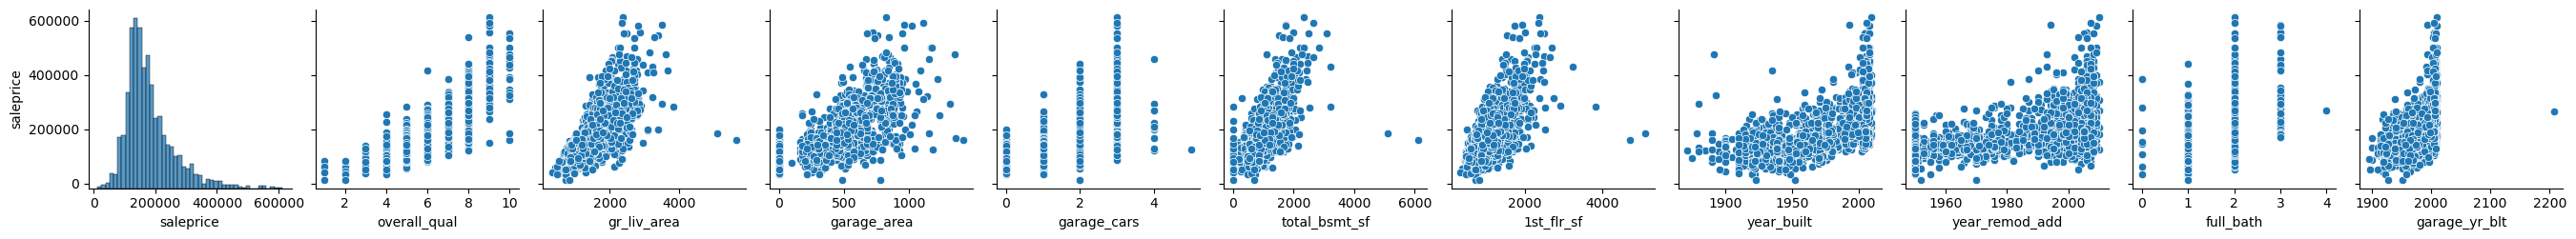

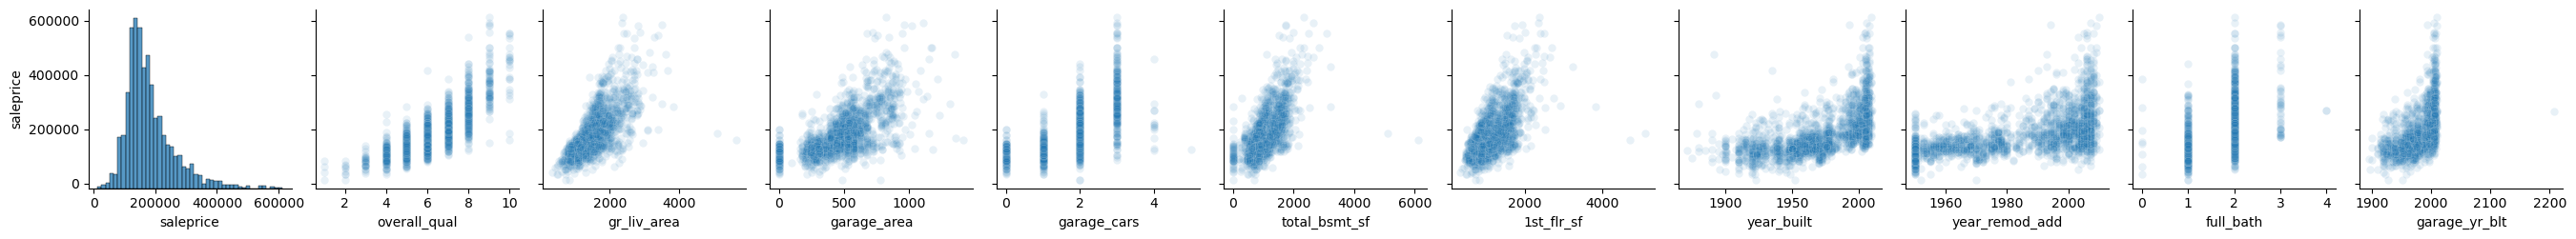

In [28]:
#call once without adjusting opactiy to highlight extremes
#call again to woth opacity get more comfort over the linearity assumption
top_correlations_1 = sorted_correlations.iloc[0:11]
selected_columns = df[top_correlations_1.index]
selected_columns['saleprice'] = df['saleprice']
sns.pairplot(selected_columns, x_vars=top_correlations_1.index, y_vars=['saleprice'])
sns.pairplot(selected_columns, x_vars=top_correlations_1.index, y_vars=['saleprice'], plot_kws={'alpha': 0.1})


/var/folders/3v/cffbrkr510z708th2gtn8s600000gn/T/ipykernel_37022/1770069624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_2['saleprice'] = df['saleprice']


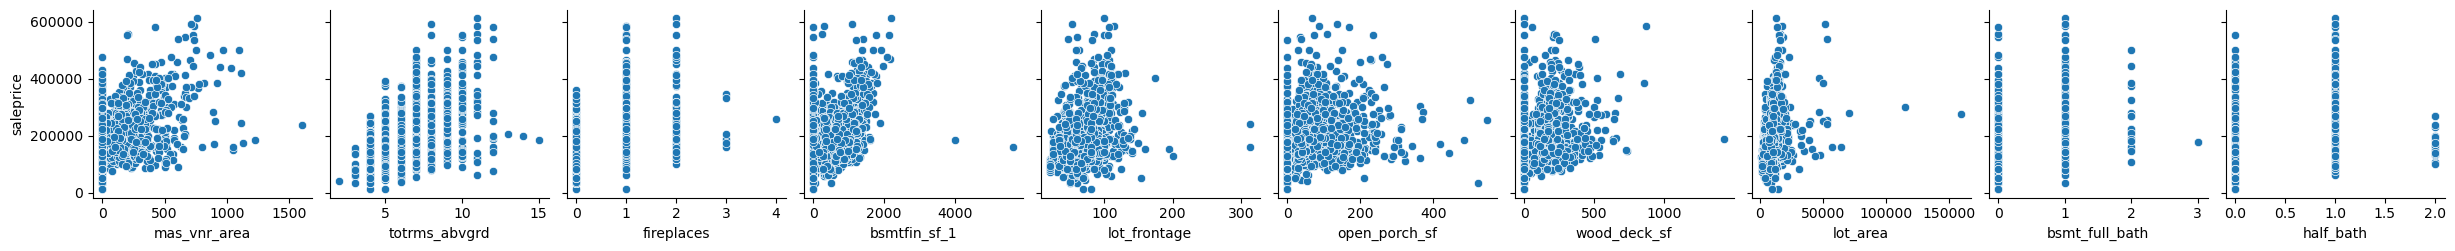

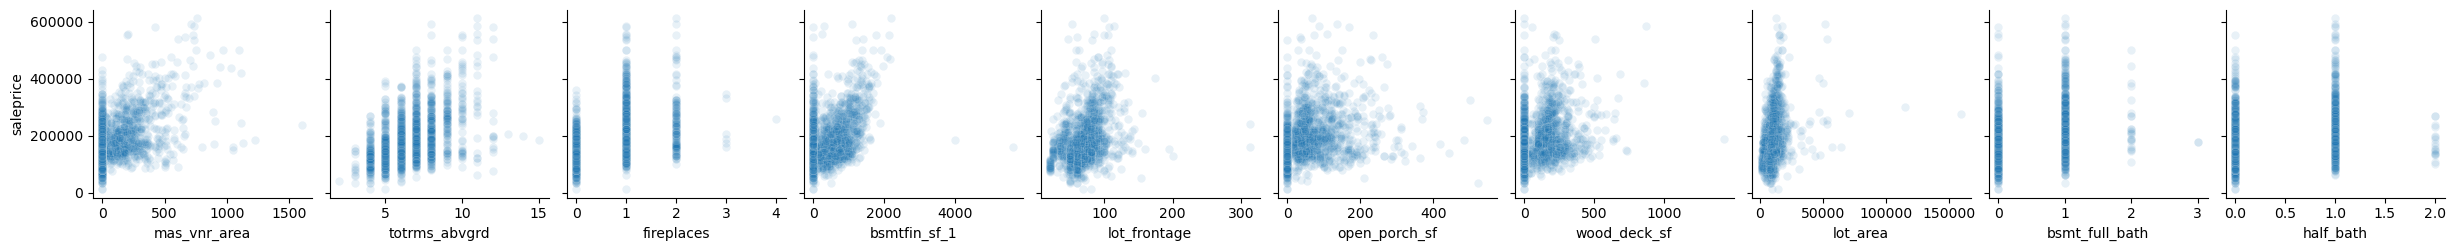

In [29]:
#call once without adjusting opactiy to highlight extremes
#call again to woth opacity get more comfort over the linearity assumption
top_correlations_2 = sorted_correlations.iloc[11:21]
selected_columns_2 = df[top_correlations_2.index]
selected_columns_2['saleprice'] = df['saleprice']
sns.pairplot(selected_columns_2, x_vars=top_correlations_2.index, y_vars=['saleprice'])
sns.pairplot(selected_columns_2, x_vars=top_correlations_2.index, y_vars=['saleprice'], plot_kws={'alpha': 0.1})

/var/folders/3v/cffbrkr510z708th2gtn8s600000gn/T/ipykernel_37022/2696970472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_3['saleprice'] = df['saleprice']


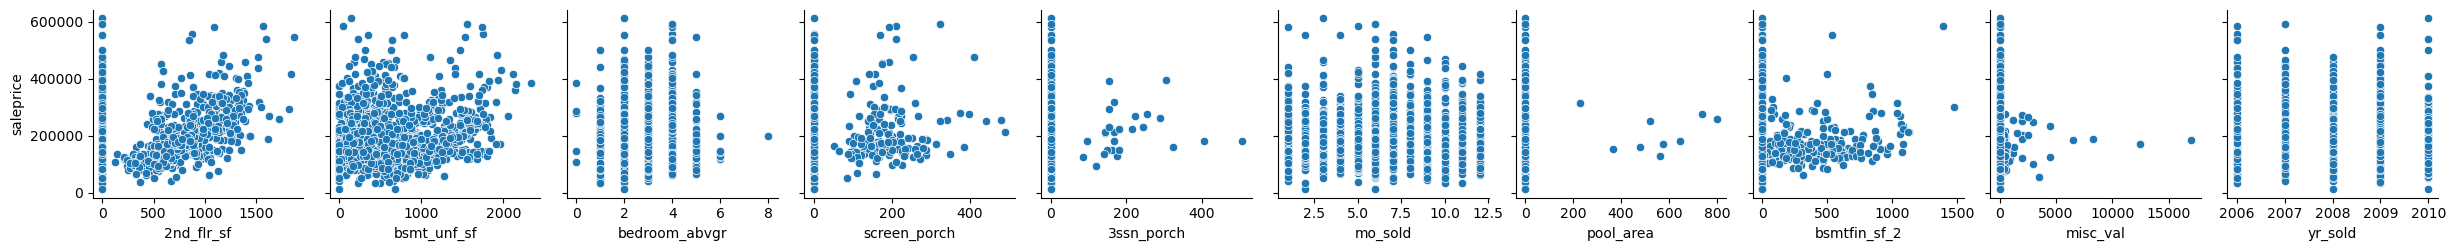

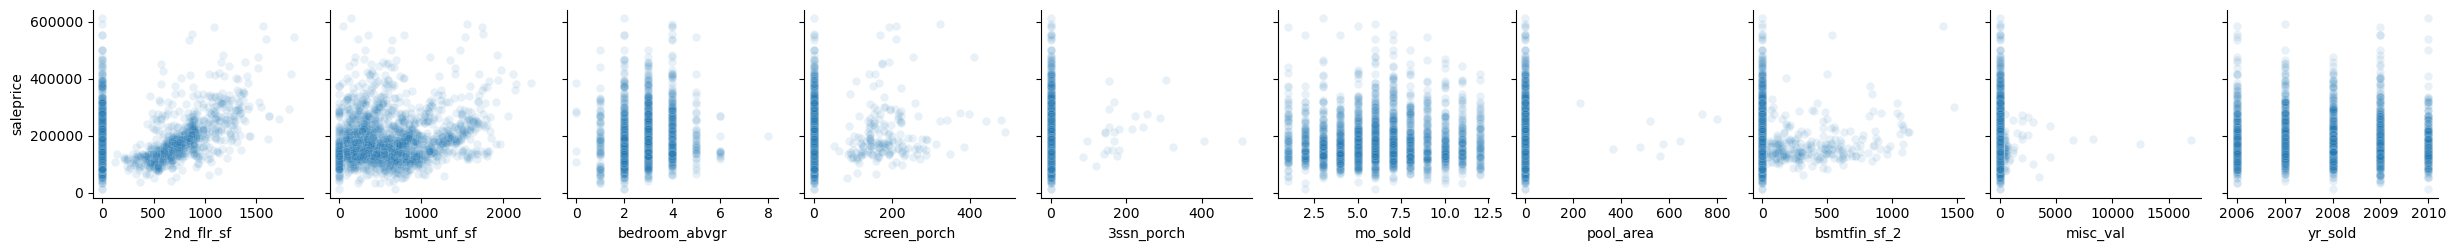

In [30]:
# Select only the 11th to 20th highest correlated variables
#call once without adjusting opactiy to highlight extremes
#call again to get more comfort over the linearity assumption
top_correlations_3 = sorted_correlations.iloc[21:31]
selected_columns_3 = df[top_correlations_3.index]
selected_columns_3['saleprice'] = df['saleprice']
sns.pairplot(selected_columns_3, x_vars=top_correlations_3.index, y_vars=['saleprice'])
sns.pairplot(selected_columns_3, x_vars=top_correlations_3.index, y_vars=['saleprice'], plot_kws={'alpha': 0.1})

/var/folders/3v/cffbrkr510z708th2gtn8s600000gn/T/ipykernel_37022/3367499002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_4['saleprice'] = df['saleprice']


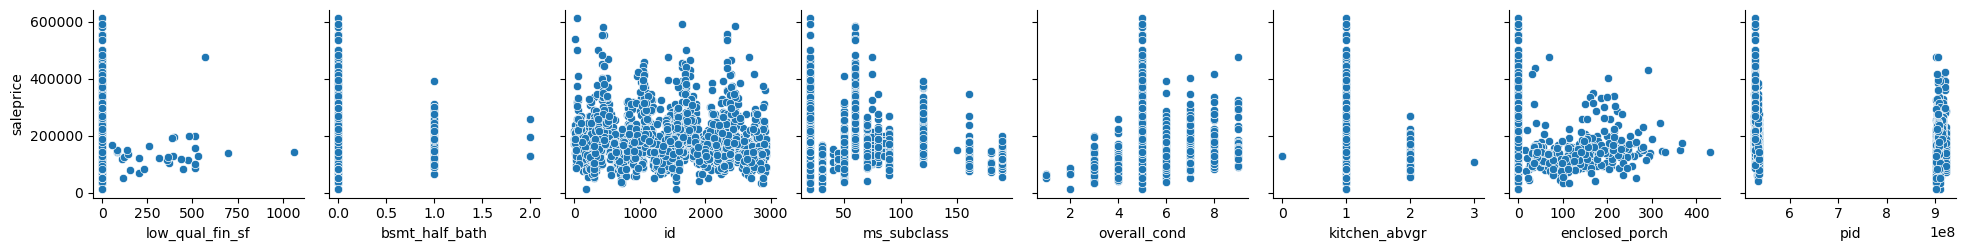

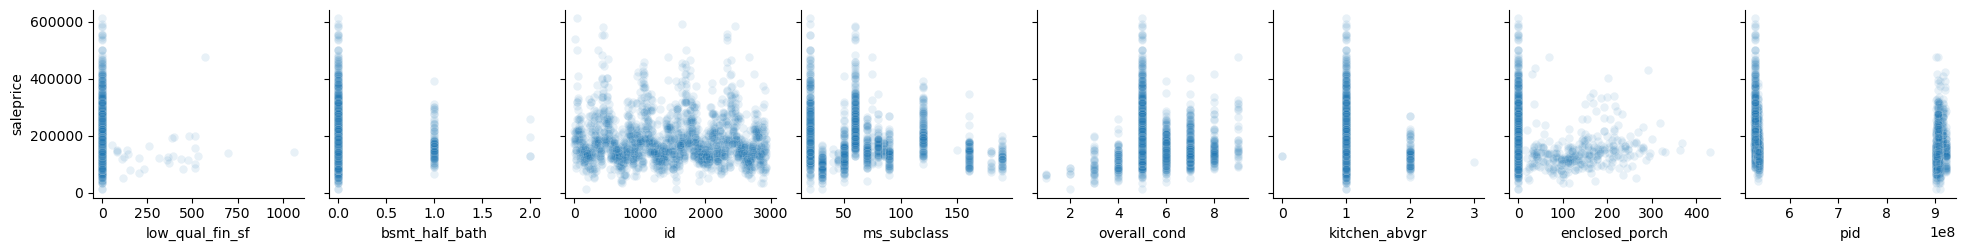

In [31]:
#call once without adjusting opactiy to highlight extremes
#call again to woth opacity get more comfort over the linearity assumption
top_correlations_4 = sorted_correlations.iloc[31:41]
selected_columns_4 = df[top_correlations_4.index]
selected_columns_4['saleprice'] = df['saleprice']
sns.pairplot(selected_columns_4, x_vars=top_correlations_4.index, y_vars=['saleprice'])
sns.pairplot(selected_columns_4, x_vars=top_correlations_4.index, y_vars=['saleprice'], plot_kws={'alpha': 0.1})

In [32]:
#Drop the highest value for Garage_Yr_blt

df = df[df['garage_yr_blt'] != df['garage_yr_blt'].max()]

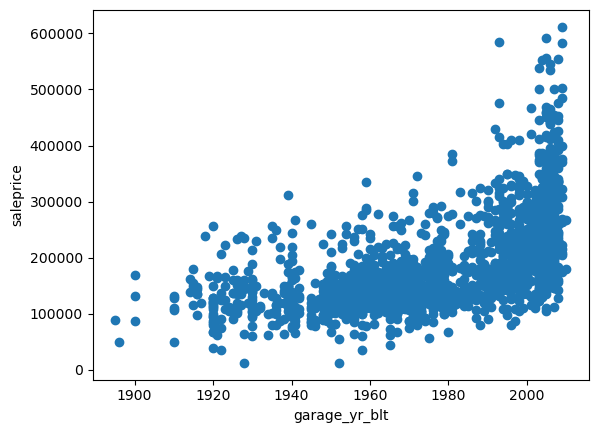

In [33]:
#confirm the dropped value
df.plot.scatter(x='garage_yr_blt', y='saleprice')
plt.scatter(df['garage_yr_blt'], df['saleprice'])


In [34]:
df_sorted = df.sort_values(by='gr_liv_area', ascending= False)
df_sorted['gr_liv_area'].head(2)

960     5642
1885    5095
Name: gr_liv_area, dtype: int64

In [35]:
df_sorted = df.sort_values(by='lot_area', ascending= False)
df_sorted['lot_area'].head(2)

471    159000
694    115149
Name: lot_area, dtype: int64

In [36]:
df_sorted = df.sort_values(by='garage_yr_blt', ascending= False)
df_sorted['garage_yr_blt'].head(3)

144     2010.0
1241    2010.0
963     2009.0
Name: garage_yr_blt, dtype: float64

In [37]:
#Confirm that the outliers are family buildings and not empty lots.
df.loc[[960,1885,471,694]]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


In [38]:
counts = df['ms_zoning'].value_counts()
counts

RL         1597
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [39]:
# Create a boolean mask to drop rwws
mask = df['ms_zoning'].isin(['C (all)', 'A (agr)', 'I (all)', 'RH', 'FV'])

# Use the boolean mask to drop the rows in place
df.drop(df[mask].index, inplace=True)

#confirm rows are dropped
df.shape


(1913, 81)

In [40]:
#drop these two columns, they are arbitrary ids given to transactions, cannot possibly predict sales
df.drop(columns = ["pid", "id"], inplace = True)


In [41]:
df.isna().sum().sort_values(ascending= False)[lambda x: x>100]

pool_qc          1904
misc_feature     1849
alley            1816
fence            1519
fireplace_qu      908
lot_frontage      314
garage_finish     103
garage_qual       103
garage_yr_blt     103
garage_cond       103
garage_type       102
dtype: int64

In [42]:
df.isnull().sum()[lambda x: x>0]

lot_frontage       314
alley             1816
mas_vnr_type        14
mas_vnr_area        14
bsmt_qual           51
bsmt_cond           51
bsmt_exposure       53
bsmtfin_type_1      51
bsmtfin_sf_1         1
bsmtfin_type_2      52
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu       908
garage_type        102
garage_yr_blt      103
garage_finish      103
garage_cars          1
garage_area          1
garage_qual        103
garage_cond        103
pool_qc           1904
fence             1519
misc_feature      1849
dtype: int64

In [43]:
#confirm only rows were dropped
df.shape

(1913, 79)

In [44]:
#just drop the rows for features that have less than 3 nulls. No need to impute values for them.
rows_to_drop = df.columns[df.isnull().sum() < 3]
df = df.dropna(subset=rows_to_drop)

In [45]:
#confirm only rows were dropped
df.shape

(1910, 79)

In [46]:
df.isnull().sum()[lambda x: x>0]


lot_frontage       314
alley             1813
mas_vnr_type        14
mas_vnr_area        14
bsmt_qual           49
bsmt_cond           49
bsmt_exposure       51
bsmtfin_type_1      49
bsmtfin_type_2      50
fireplace_qu       906
garage_type        102
garage_yr_blt      102
garage_finish      102
garage_qual        102
garage_cond        102
pool_qc           1901
fence             1518
misc_feature      1846
dtype: int64

In [47]:
cols_to_drop = df.columns[df.isnull().sum() > 105]
df = df.drop(cols_to_drop, axis=1)


In [48]:
#confirm columns dropped
df.shape

(1910, 73)

<font size="8">Section 3</font>
<a id='destination_cell_3'></a>

[Return to Table of Contents](#destination_cell_10)

In [49]:
#Theses are the features we will impute values for
df.isnull().sum()[lambda x: x>0]

mas_vnr_type       14
mas_vnr_area       14
bsmt_qual          49
bsmt_cond          49
bsmt_exposure      51
bsmtfin_type_1     49
bsmtfin_type_2     50
garage_type       102
garage_yr_blt     102
garage_finish     102
garage_qual       102
garage_cond       102
dtype: int64

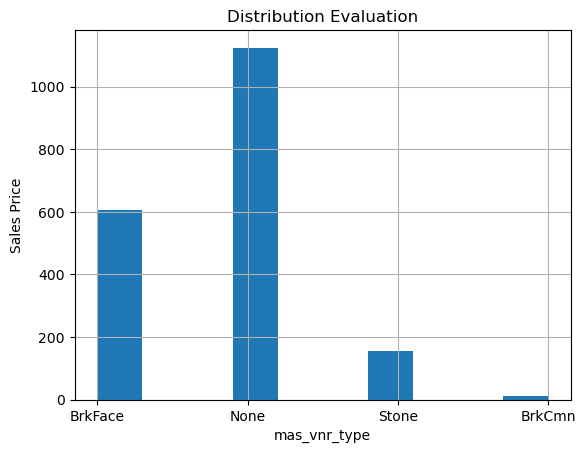

<Figure size 10x10 with 0 Axes>

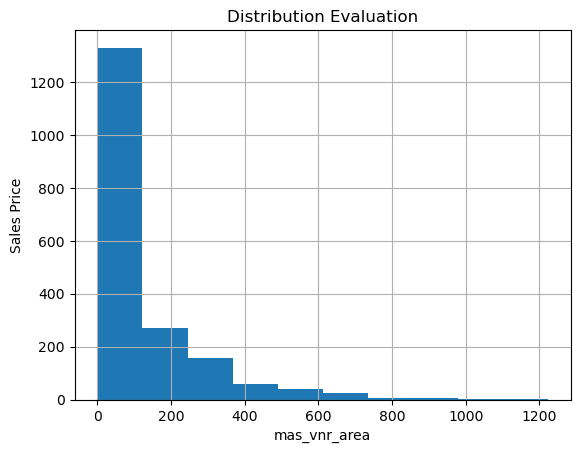

<Figure size 10x10 with 0 Axes>

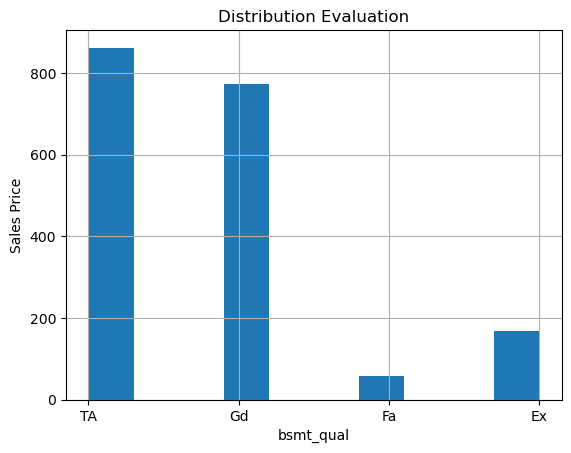

<Figure size 10x10 with 0 Axes>

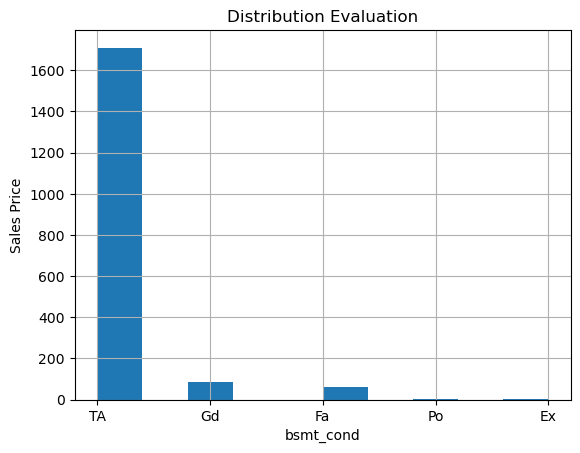

<Figure size 10x10 with 0 Axes>

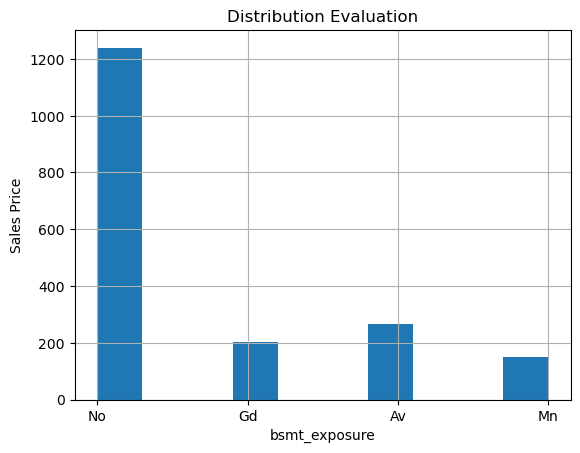

<Figure size 10x10 with 0 Axes>

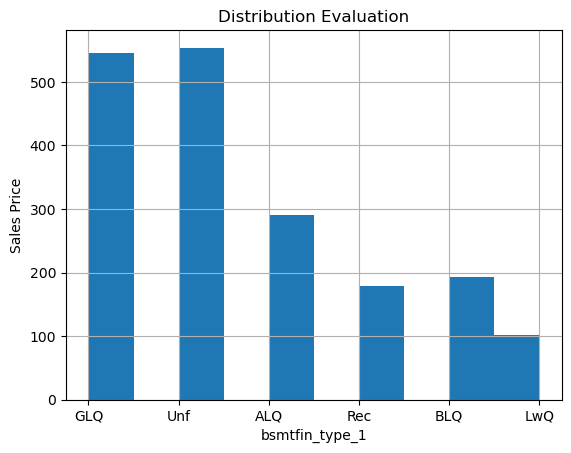

<Figure size 10x10 with 0 Axes>

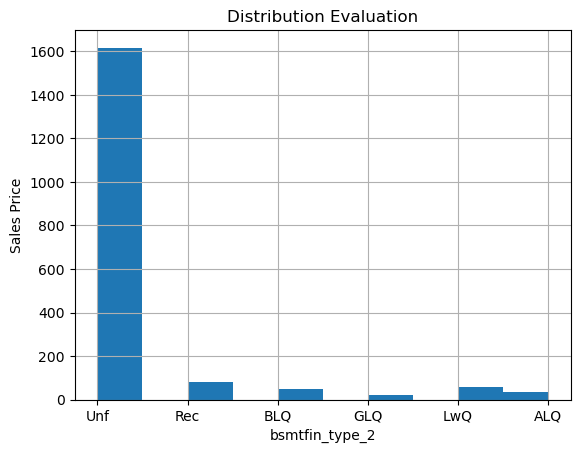

<Figure size 10x10 with 0 Axes>

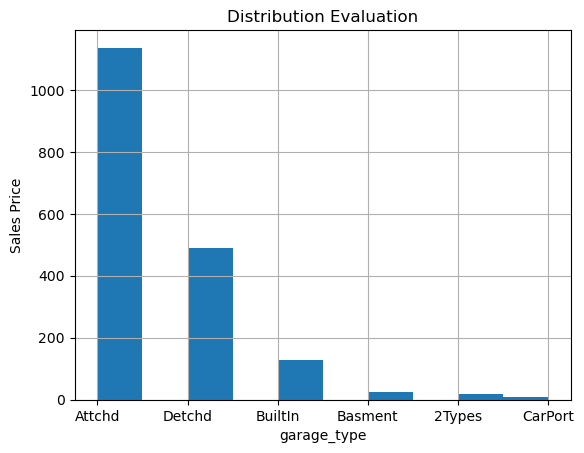

<Figure size 10x10 with 0 Axes>

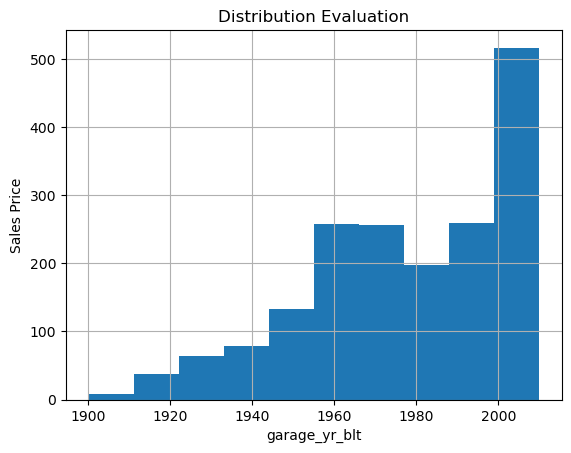

<Figure size 10x10 with 0 Axes>

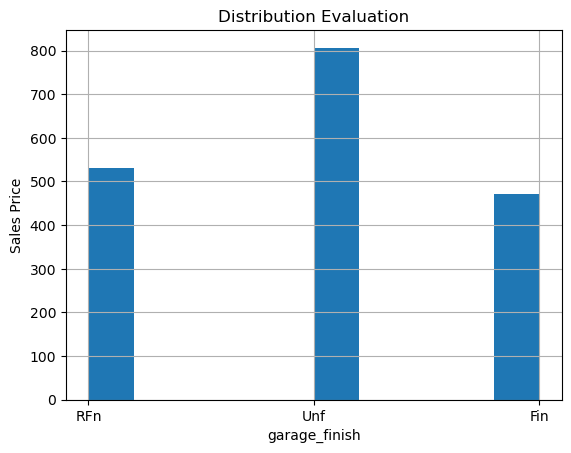

<Figure size 10x10 with 0 Axes>

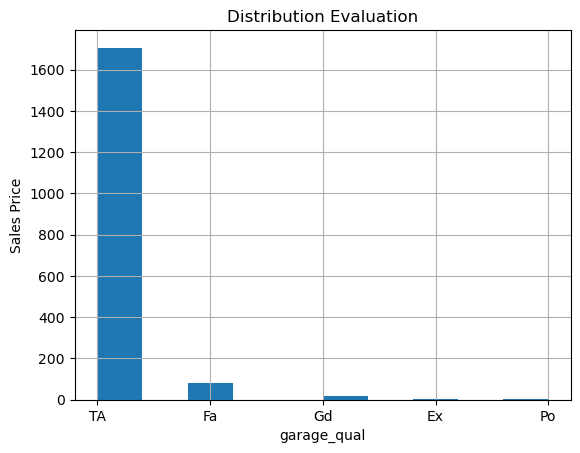

<Figure size 10x10 with 0 Axes>

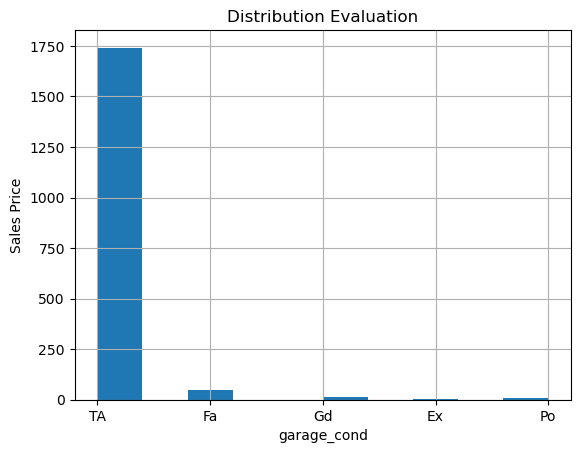

<Figure size 10x10 with 0 Axes>

In [50]:
# Get the column names of columns with missing values
imputable_columns = list(df.isnull().sum()[lambda x: x>0].index)

# Create histograms for each column with missing values
for col in imputable_columns:
    df[col].hist()
    plt.title('Distribution Evaluation')
    plt.xlabel(col)
    plt.ylabel("Sales Price")
    plt.figure(figsize=(.1, .1))
    plt.show()


Impute central tendency measure based on distribution:

mas_vnr_type -->Mode       
mas_vnr_area -->Median    
bsmt_qual -->Mode  
bsmt_cond -->Mode          
bsmt_exposure -->Mode      
bsmtfin_type_1 --> Mode    
bsmtfin_type_2 -->Mode     
garage_type  -->Mode      
garage_yr_blt -->Median
garage_finish -->Mode    
garage_qual -->Mode     
garage_cond -->Mode

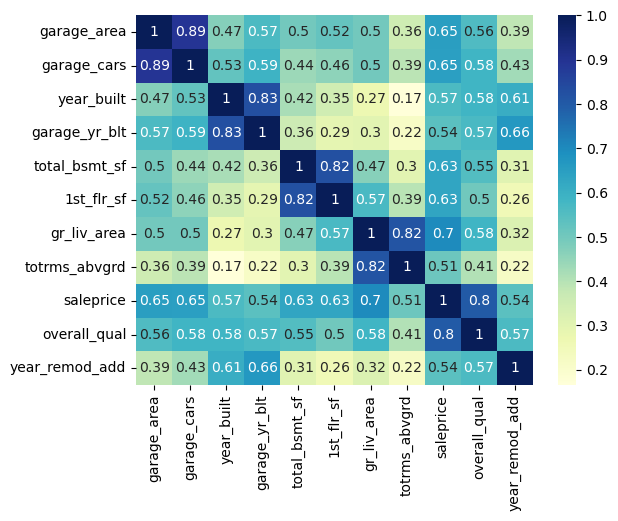

In [51]:
#looking for multicollinearity

# Select only the numeric columns from the DataFrame
df_numeric = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Unstack the correlation matrix and sort the values in descending order
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Select the 15 highest correlations, excluding self-correlations
highest_corr_pairs = corr_pairs[corr_pairs != 1].head(15)

# Get the column names for the highest correlations
highest_corr_cols = highest_corr_pairs.index.get_level_values(0).unique()

# Create a heatmap of the highest correlations
sns.heatmap(corr_matrix.loc[highest_corr_cols, highest_corr_cols], cmap="YlGnBu", annot=True)

# Show the plot
plt.show()


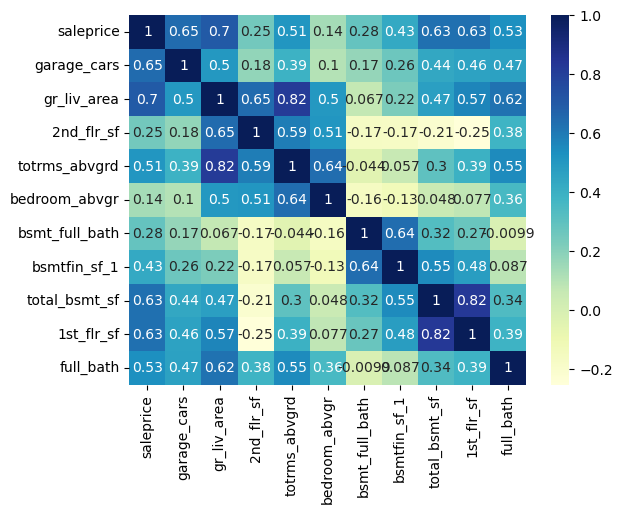

In [52]:
# Select the next 15 highest correlations (i.e., correlations ranked 16-30)
next_highest_corr_pairs = corr_pairs[corr_pairs != 1].iloc[15:30]

# Get the column names for the highest correlations
next_highest_corr_pairs = next_highest_corr_pairs.index.get_level_values(0).unique()

# Create a heatmap of the highest correlations
sns.heatmap(corr_matrix.loc[next_highest_corr_pairs, next_highest_corr_pairs], cmap="YlGnBu", annot=True)

# Show the plot
plt.show()

In [53]:
# Re-check to see no null values outside of categories we will impute
for feature in df:
    print(f'There are {df[feature].isnull().sum()} null values in the column {feature} -- type = {df[feature].dtypes}   ')

There are 0 null values in the column ms_subclass -- type = int64   
There are 0 null values in the column ms_zoning -- type = object   
There are 0 null values in the column lot_area -- type = int64   
There are 0 null values in the column street -- type = object   
There are 0 null values in the column lot_shape -- type = object   
There are 0 null values in the column land_contour -- type = object   
There are 0 null values in the column utilities -- type = object   
There are 0 null values in the column lot_config -- type = object   
There are 0 null values in the column land_slope -- type = object   
There are 0 null values in the column neighborhood -- type = object   
There are 0 null values in the column condition_1 -- type = object   
There are 0 null values in the column condition_2 -- type = object   
There are 0 null values in the column bldg_type -- type = object   
There are 0 null values in the column house_style -- type = object   
There are 0 null values in the column 

<font size="8">Section 4</font>
<a id='destination_cell_4'></a>

[Return to Table of Contents](#destination_cell_10)



In [54]:
### prepare our train data to split into train/validation
#we must split before we impute to prevent leakage
X = df[["gr_liv_area", "garage_area","neighborhood", "total_bsmt_sf", "1st_flr_sf", "year_built",
             "year_remod_add", "full_bath", "garage_yr_blt", "overall_qual", "ms_zoning",
             "lot_area", "bldg_type", "ms_subclass"]]

y = df['saleprice']

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 42,
                                                 )

In [56]:
# Define a dictionary that maps column names to their corresponding central tendency measure
impute_methods = {
    'mas_vnr_type': 'mode',
    'mas_vnr_area': 'median',
    'bsmt_qual': 'mode',
    'bsmt_cond': 'mode',
    'bsmt_exposure': 'mode',
    'bsmtfin_type_1': 'mode',
    'bsmtfin_type_2': 'mode',
    'garage_type': 'mode',
    'garage_yr_blt': 'median',
    'garage_finish': 'mode',
    'garage_qual': 'mode',
    'garage_cond': 'mode'
}

# Impute missing values in each column with their corresponding central tendency measure for training data
for col, method in impute_methods.items():
    # Check if the column is present in both X_train and impute_methods
    if col in X_train.columns:
        if method == 'mode':
            # Calculate the mode of the column
            col_mode = X_train[col].mode()[0]

            # Replace missing values with the mode
            X_train[col].fillna(col_mode, inplace=True)
        elif method == 'median':
            # Calculate the median of the column
            col_median = X_train[col].median()

            # Replace missing values with the median
            X_train[col].fillna(col_median, inplace=True)


In [57]:
# Impute missing values in the validation data
for col, method in impute_methods.items():
    # Check if the column is present in both X_val and impute_methods
    if col in X_val.columns:
        if method == 'mode':
            # Calculate the mode of the column from the training data
            col_mode = X_train[col].mode()[0]

            # Replace missing values with the mode
            X_val[col].fillna(col_mode, inplace=True)
        elif method == 'median':
            # Calculate the median of the column from the training data
            col_median = X_train[col].median()

            # Replace missing values with the median
            X_val[col].fillna(col_median, inplace=True)


In [58]:
# Re-check to see no null values
for feature in df:
    print(f'There are {df[feature].isnull().sum()} null values in the column {feature} -- type = {df[feature].dtypes}   ')

There are 0 null values in the column ms_subclass -- type = int64   
There are 0 null values in the column ms_zoning -- type = object   
There are 0 null values in the column lot_area -- type = int64   
There are 0 null values in the column street -- type = object   
There are 0 null values in the column lot_shape -- type = object   
There are 0 null values in the column land_contour -- type = object   
There are 0 null values in the column utilities -- type = object   
There are 0 null values in the column lot_config -- type = object   
There are 0 null values in the column land_slope -- type = object   
There are 0 null values in the column neighborhood -- type = object   
There are 0 null values in the column condition_1 -- type = object   
There are 0 null values in the column condition_2 -- type = object   
There are 0 null values in the column bldg_type -- type = object   
There are 0 null values in the column house_style -- type = object   
There are 0 null values in the column 

In [59]:
# Re-check to see no null values for imputed features from our X_train dataset
for feature in X_train:
    print(f'There are {X_train[feature].isnull().sum()} null values in the column {feature} -- type = {X_train[feature].dtypes}   ')

There are 0 null values in the column gr_liv_area -- type = int64   
There are 0 null values in the column garage_area -- type = float64   
There are 0 null values in the column neighborhood -- type = object   
There are 0 null values in the column total_bsmt_sf -- type = float64   
There are 0 null values in the column 1st_flr_sf -- type = int64   
There are 0 null values in the column year_built -- type = int64   
There are 0 null values in the column year_remod_add -- type = int64   
There are 0 null values in the column full_bath -- type = int64   
There are 0 null values in the column garage_yr_blt -- type = float64   
There are 0 null values in the column overall_qual -- type = int64   
There are 0 null values in the column ms_zoning -- type = object   
There are 0 null values in the column lot_area -- type = int64   
There are 0 null values in the column bldg_type -- type = object   
There are 0 null values in the column ms_subclass -- type = int64   


In [60]:
# Re-check to see no null values for imputed features from our X_val dataset
for feature in X_val:
    print(f'There are {X_train[feature].isnull().sum()} null values in the column {feature} -- type = {X_train[feature].dtypes}   ')

There are 0 null values in the column gr_liv_area -- type = int64   
There are 0 null values in the column garage_area -- type = float64   
There are 0 null values in the column neighborhood -- type = object   
There are 0 null values in the column total_bsmt_sf -- type = float64   
There are 0 null values in the column 1st_flr_sf -- type = int64   
There are 0 null values in the column year_built -- type = int64   
There are 0 null values in the column year_remod_add -- type = int64   
There are 0 null values in the column full_bath -- type = int64   
There are 0 null values in the column garage_yr_blt -- type = float64   
There are 0 null values in the column overall_qual -- type = int64   
There are 0 null values in the column ms_zoning -- type = object   
There are 0 null values in the column lot_area -- type = int64   
There are 0 null values in the column bldg_type -- type = object   
There are 0 null values in the column ms_subclass -- type = int64   


<font size="8">Section 5</font>
<a id='destination_cell_5'></a>

[Return to Table of Contents](#destination_cell_10)





In [61]:
#get numeric cols
numeric = [col for col in X_train._get_numeric_data().columns]

#get non-numeric cols 
categories = X_train.select_dtypes(include = 'object').columns

In [62]:
ohe = OneHotEncoder(drop = 'if_binary',
                   sparse_output = False,
                   handle_unknown = 'ignore')

ctx = ColumnTransformer(
    transformers =[
        ('ohe', ohe, categories),
        ('ss', StandardScaler(), numeric)
    ], remainder = 'passthrough', verbose_feature_names_out=False)

In [63]:
# Fit the ColumnTransformer to the training data
ctx.fit(X_train)

# Transform the training data
X_train_transformed = ctx.transform(X_train)

# Transform the validation data
X_val_transformed = ctx.transform(X_val)


In [64]:
# Get the transformed column names
transformed_columns = ctx.get_feature_names_out()

# Create a DataFrame from the transformed data with the column names
df_transformed = pd.DataFrame(X_train_transformed, columns=transformed_columns)




<font size="8">Section 6</font>
<a id='destination_cell_6'></a>
[Return to Table of Contents](#destination_cell_10)



In [65]:
lr = LinearRegression()


In [66]:
# Combine the ColumnTransformer and LinearRegression model into a pipeline
lr_pipe = Pipeline(steps=[
    ('ctx', ctx),
    ('lr', lr)
])

# Fit the pipeline to the training data
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('ctx',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['neighborhood', 'ms_zoning', 'bldg_type'], dtype='object')),
                                                 ('ss', StandardScaler(),
                                                  ['gr_liv_area', 'garage_area',
                                                   'total_bsmt_sf',
                                                   '1st_flr_sf', 'year_built',
                                                   'year_remod_add',
                                                   'full_bath', 'garage_yr_blt',
                                                   'overall_qual', 'lot_area',
                                                   'ms_subclass'])],
                                   verbose_feature_names_out=False)),
                ('lr', LinearRegression())])

In [67]:
# get the coefficients and intercept
coefficients = lr_pipe.named_steps['lr'].coef_
intercept = lr_pipe.named_steps['lr'].intercept_

# print the equation
equation = "y = " + str(intercept)
for i, coef in enumerate(coefficients):
    equation += " + " + str(coef) + " * x" + str(i+1)
print(equation)


y = -7.944096696232245e+16 + 8551800530215319.0 * x1 + 8551800530213576.0 * x2 + 8551800530214010.0 * x3 + 8551800530191672.0 * x4 + 8551800530214786.0 * x5 + 8551800530185876.0 * x6 + 8551800530221332.0 * x7 + 8551800530181570.0 * x8 + 8551800530182558.0 * x9 + 8551800530230371.0 * x10 + 8551800530320431.0 * x11 + 8551800530183371.0 * x12 + 8551800530221903.0 * x13 + 8551800530191312.0 * x14 + 8551800530188826.0 * x15 + 8551800530219450.0 * x16 + 8551800530184896.0 * x17 + 8551800530232393.0 * x18 + 8551800530256141.0 * x19 + 8551800530181958.0 * x20 + 8551800530185163.0 * x21 + 8551800530186376.0 * x22 + 8551800530184773.0 * x23 + 8551800530195552.0 * x24 + 8551800530277819.0 * x25 + 8551800530201355.0 * x26 + 8551800530225585.0 * x27 + 1834.9936669371211 * x28 + 7.0889166432309496e+16 * x29 + 7.088916643231875e+16 * x30 + 7.0889166432297544e+16 * x31 + 7.088916643226246e+16 * x32 + 7.088916643227263e+16 * x33 + 19328.07155049318 * x34 + 7268.764925256219 * x35 + 4187.113190578009 * 

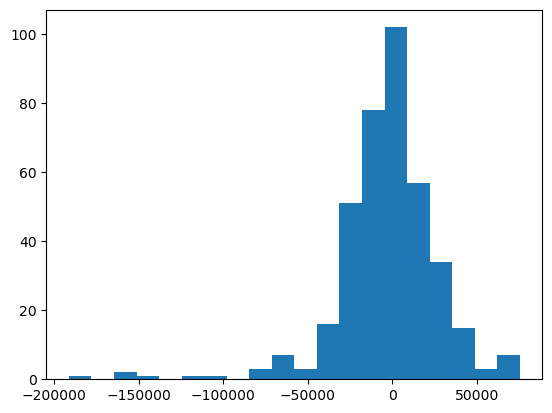

In [68]:
y_pred = lr_pipe.predict(X_val)
residuals=y_pred - y_val
plt.hist(residuals, bins = 20);

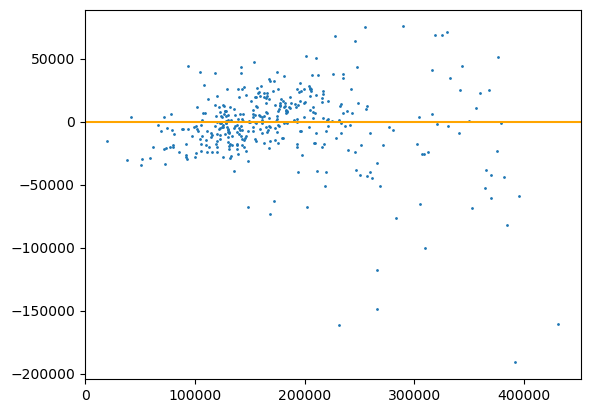

In [69]:
# Looks random

plt.scatter(y_pred, residuals, s = 1)
plt.axhline(0, color = 'orange');

In [70]:
cross_val_score(lr_pipe, X_train, y_train)


array([0.86573414, 0.70763454, 0.86405511, 0.85182095, 0.75834318])

In [71]:
scores = cross_val_score(lr_pipe, X_train, y_train)
std_dev = np.std(scores)
std_dev

0.06468877991858132

In [72]:
cross_val_score(lr_pipe, X_train, y_train).mean()


0.8095175872552985

In [73]:
lr_pipe.score(X_train, y_train)

0.8341138367028027

In [74]:
lr_pipe.score(X_val, y_val)


0.8603362900092751

In [75]:
#RMSE
mean_squared_error(y_train, lr_pipe.predict(X_train), squared = False)

32227.126947788885

In [76]:
#RMSE
mean_squared_error(y_val, lr_pipe.predict(X_val), squared = False)

30547.896646001085

<font size="8">Section 7</font>
<a id='destination_cell_7'></a>

[Return to Table of Contents](#destination_cell_10)

In [77]:
#instantiate it
rg_pipe = Pipeline(
    steps = [
        ('ctx', ctx),
        ('rg', Ridge(alpha = 10))
    ]
)

#fit it!
rg_pipe.fit(X_train, y_train)

Pipeline(steps=[('ctx',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['neighborhood', 'ms_zoning', 'bldg_type'], dtype='object')),
                                                 ('ss', StandardScaler(),
                                                  ['gr_liv_area', 'garage_area',
                                                   'total_bsmt_sf',
                                                   '1st_flr_sf', 'year_built',
                                                   'year_remod_add',
                                                   'full_bath', 'garage_yr_blt',
                                                   'overall_qual', 'lot_area',
                                                   'ms_subclass'])],
                                   verbose_feature_names_out=False)),
                ('rg', Ridge(alpha=10))])

In [78]:
y_pred_rg = rg_pipe.predict(X_val)

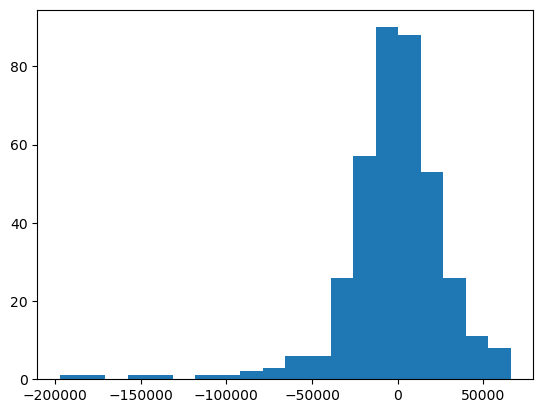

In [79]:
y_pred_rg = rg_pipe.predict(X_val)
residuals_rg=y_pred_rg - y_val
plt.hist(residuals_rg, bins = 20);

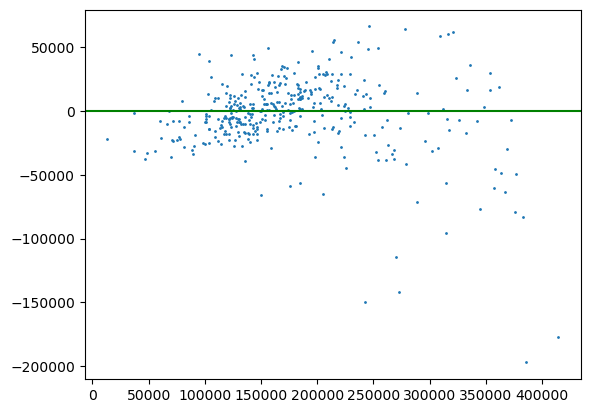

In [80]:
# Looks random

plt.scatter(y_pred_rg, residuals_rg, s = 1)
plt.axhline(0, color = 'green');

In [81]:
cross_val_score(rg_pipe, X_train, y_train)

array([0.86239875, 0.68791405, 0.86434969, 0.86092757, 0.75717917])

In [82]:
cross_val_score(rg_pipe, X_train, y_train).mean()

0.8065538462458738

In [83]:
scores_rg = cross_val_score(rg_pipe, X_train, y_train)
std_dev_rg = np.std(scores_rg)
std_dev_rg

0.07201218862401906

In [84]:
rg_pipe.score(X_train, y_train)

0.8288362429641887

In [85]:
rg_pipe.score(X_val, y_val)

0.8632940205991387

In [86]:
#RMSE
mean_squared_error(y_train, rg_pipe.predict(X_train), squared = False)

32735.75892840848

In [87]:
#RMSE
mean_squared_error(y_val, rg_pipe.predict(X_val), squared = False)

30222.701426024814

<font size="8">Section 8</font>
<a id='destination_cell_8'></a>

[Return to Table of Contents](#destination_cell_10)

In [88]:
#instantiate it
lasso_pipe = Pipeline(
    steps = [
        ('ctx', ctx),
        ('lasso', Lasso(alpha=5.0))
    ]
)

#fit it!
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('ctx',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['neighborhood', 'ms_zoning', 'bldg_type'], dtype='object')),
                                                 ('ss', StandardScaler(),
                                                  ['gr_liv_area', 'garage_area',
                                                   'total_bsmt_sf',
                                                   '1st_flr_sf', 'year_built',
                                                   'year_remod_add',
                                                   'full_bath', 'garage_yr_blt',
                                                   'overall_qual', 'lot_area',
                                                   'ms_subclass'])],
                                   verbose_feature_names_out=False)),
                ('lasso', Lasso(alpha=5.0))])

In [89]:
y_pred_lasso = lasso_pipe.predict(X_val)


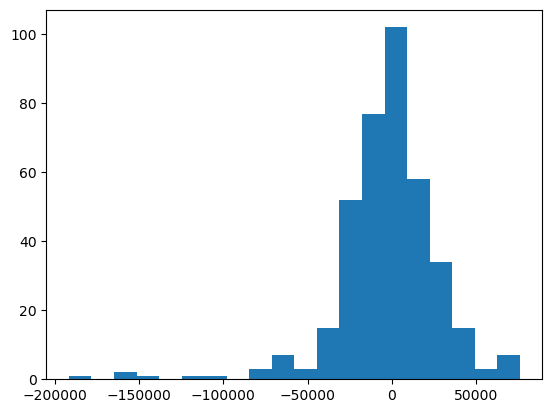

In [90]:
y_pred_lasso = lasso_pipe.predict(X_val)
residuals_lasso = y_pred_lasso - y_val
plt.hist(residuals_lasso, bins = 20);

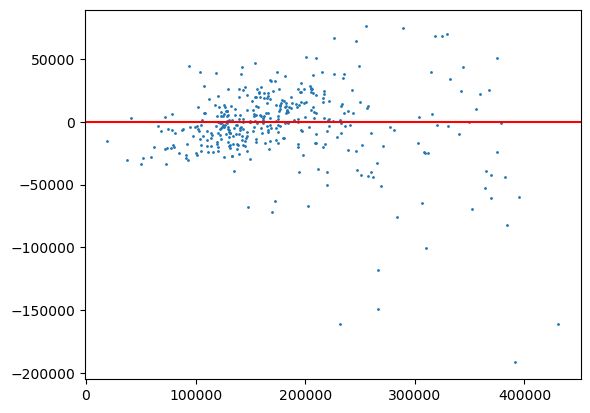

In [91]:
# Looks random

plt.scatter(y_pred_lasso, residuals_lasso, s = 1)
plt.axhline(0, color = 'red');

In [92]:
cross_val_score(lasso_pipe, X_train, y_train)

array([0.86839257, 0.70690666, 0.86458676, 0.85222463, 0.75879147])

In [93]:
cross_val_score(lasso_pipe, X_train, y_train).mean()

0.8101804209948634

In [94]:
scores_lasso = cross_val_score(lasso_pipe, X_train, y_train)
std_dev_lasso = np.std(scores_lasso)
std_dev_lasso

0.06545641713772092

In [95]:
lasso_pipe.score(X_train, y_train)

0.834088914139242

In [96]:
lasso_pipe.score(X_val, y_val)

0.8607274987005542

In [97]:
#RMSE
mean_squared_error(y_train, lasso_pipe.predict(X_train), squared = False)

32229.547741780094

In [98]:
#RMSE
mean_squared_error(y_val, lasso_pipe.predict(X_val), squared = False)

30505.08315118816


<font size="8">Section 9</font>
<a id='destination_cell_9'></a>

[Return to Table of Contents](#destination_cell_10)

In [99]:
#instantiate it
elastic_pipe = Pipeline(
    steps = [
        ('ctx', ctx),
        ('elastic', ElasticNet(alpha=1.0))
    ]
)

#fit it!
elastic_pipe.fit(X_train, y_train)

Pipeline(steps=[('ctx',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['neighborhood', 'ms_zoning', 'bldg_type'], dtype='object')),
                                                 ('ss', StandardScaler(),
                                                  ['gr_liv_area', 'garage_area',
                                                   'total_bsmt_sf',
                                                   '1st_flr_sf', 'year_built',
                                                   'year_remod_add',
                                                   'full_bath', 'garage_yr_blt',
                                                   'overall_qual', 'lot_area',
                                                   'ms_subclass'])],
                                   verbose_feature_names_out=False)),
                ('elastic', ElasticNet())])

In [100]:
y_pred_elastic = elastic_pipe.predict(X_val)


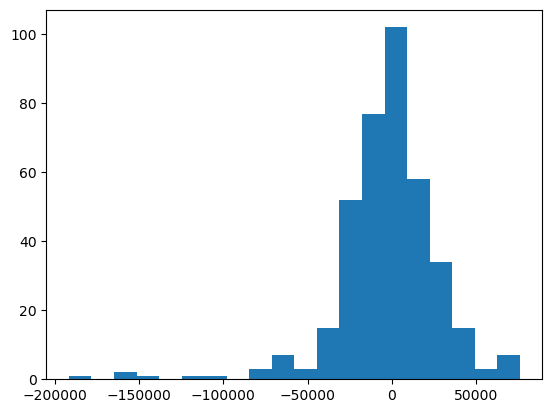

In [101]:
y_pred_elastic = lasso_pipe.predict(X_val)
residuals_elastic= y_pred_lasso - y_val
plt.hist(residuals_elastic, bins = 20);

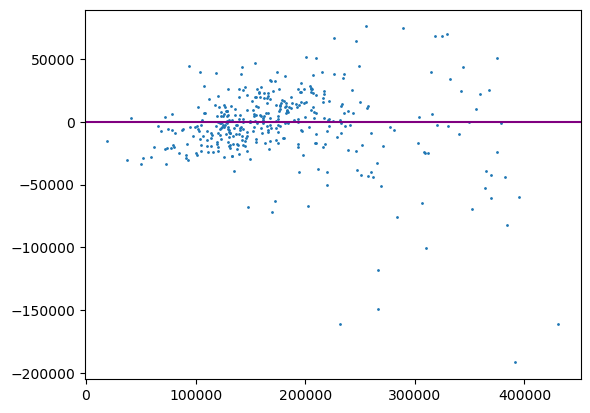

In [102]:
# Looking for randomness!

plt.scatter(y_pred_elastic, residuals_elastic, s = 1)
plt.axhline(0, color = 'purple');

In [103]:
cross_val_score(elastic_pipe, X_train, y_train)

array([0.79791756, 0.63852688, 0.80703891, 0.82471362, 0.71802508])

In [104]:
scores_elastic = cross_val_score(elastic_pipe, X_train, y_train)
std_dev_elastic = np.std(scores_elastic)
std_dev_elastic

0.06973937218452135

In [105]:
cross_val_score(elastic_pipe, X_train, y_train).mean()

0.7572444075774636

In [106]:
elastic_pipe.score(X_train, y_train)

0.7676409485155041

In [107]:
elastic_pipe.score(X_val, y_val)

0.8111486787099247

In [108]:
#RMSE
mean_squared_error(y_train, elastic_pipe.predict(X_train), squared = False)

38141.37154281331

In [109]:
#RMSE
mean_squared_error(y_val, elastic_pipe.predict(X_val), squared = False)

35522.17416151448